# Demonstration of blending and extrapolation

We can use ndpolator to blend the default table with a fallback table. Here we demonstrate how to do it.

Start with the usual imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from ndpolator import Ndpolator

Initialize the fallback table:

In [2]:
ft = np.ones(shape=(21, 1))
ft_axes = (np.linspace(0, 1, 21),)

Initialize the default table:

In [3]:
dt = np.ones(shape=(11, 7, 5, 1))
dt_axes = (np.linspace(0.25, 0.75, 11), np.linspace(2, 2.75, 7), np.linspace(5, 6, 5))

indices = [np.arange(len(ax)) for ax in dt_axes]
for (inds, combo) in zip(product(*indices), product(*dt_axes)):
    dt[inds] = 1 + 0.1*(np.array(combo).sum()-8.375)

While the default table is 3D, let's plot a cross-section of it in 2D as a heatmap:

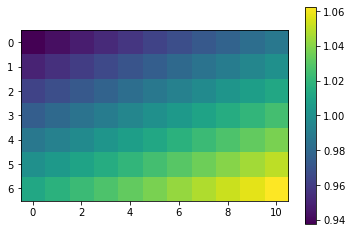

In [4]:
plt.imshow(dt[:,:,2,0].T)
plt.colorbar()

Instantiate ndpolator instances based on the default table and on the fallback table:

In [5]:
default_ndp = Ndpolator(axes=dt_axes, grid=dt)
fallback_ndp = Ndpolator(axes=ft_axes, grid=ft)

Define points of interest:

In [6]:
poi = default_ndp.tabulate((np.linspace(0, 1, 51), 2.375, 5.5))

Clearly the values in the first axis fall off the default grid. We will blend the values with the fallback grid:

In [7]:
blended = default_ndp.blend(req=poi, fallback_ndp=fallback_ndp, extrapolation_method='linear', blending_func='sigmoid', blending_region=((0.15, 0.15), (0.25, 0.25), (0.5, 0.5)))

Plot to see the transition over the blended region:

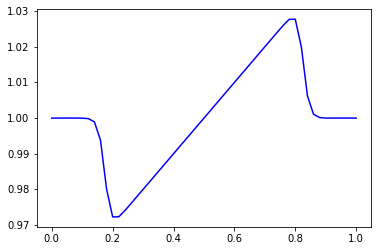

In [8]:
plt.plot(poi[:,0], blended, 'b-')

Now do the same, but in all dimensions (and heavily oversampled):

In [9]:
poi = np.array(list((product(np.linspace(0, 1, 51), np.linspace(1.50, 3.25, 71), np.linspace(4, 7, 61)))))
blended = default_ndp.blend(req=poi, fallback_ndp=fallback_ndp, extrapolation_method='linear', blending_func='sigmoid', blending_region=((0.15, 0.15), (0.25, 0.25), (0.5, 0.5)))

Reshape to the original axes and plot all cross-sections:

In [10]:
m = blended.reshape(51, 71, 61, 1)

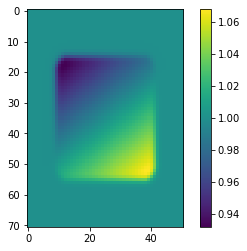

In [11]:
plt.imshow(m[:,:,30,0].T)
plt.colorbar()
plt.show()

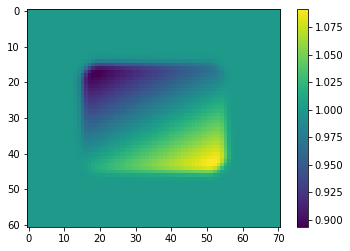

In [12]:
plt.imshow(m[21,:,:,0].T)
plt.colorbar()
plt.show()

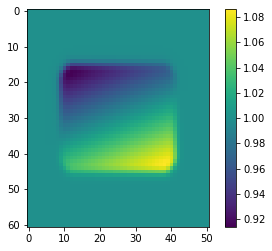

In [13]:
plt.imshow(m[:,35,:,0].T)
plt.colorbar()
plt.show()